<a href="https://colab.research.google.com/github/MananMehta07/AlzheimerDetection_model/blob/main/Mpr_aids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

ALZHEIMER'S DISEASE:
Alzheimer's disease (AD) is a neurodegenerative disorder of uncertain cause and pathogenesis that primarily affects older adults and is the most common cause of dementia.

The earliest clinical manifestation of AD is selective memory impairment and while treatments are available for some symptoms, there is no cure currently available.

Brain Imaging via magnetic resonance imaging (MRI), is used for evaluation of patients with suspected AD.
MRI findings include both, local and generalized shrinkage of brain tissue. Below is a pictorial representation of tissue shrinkage:
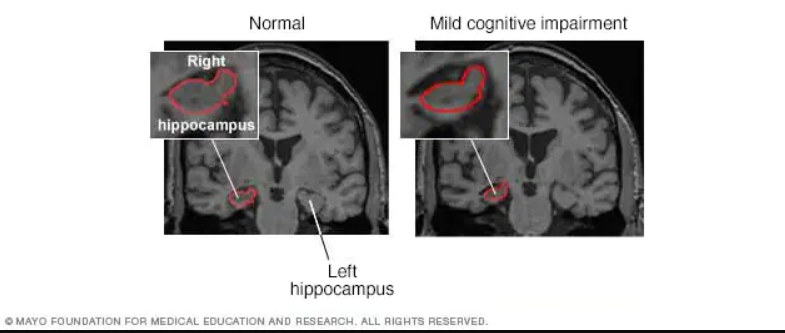

Some studies have suggested that MRI features may predict rate of decline of AD and may guide therapy in the future.
However in order to reach that stage clinicians and researchers will have to make use of machine learning techniques that can accurately predict progress of a patient from mild cognitive impairment to dementia.
We propose to develop a sound model that can help clinicians do that and predict early alzheimer's




# **DATA DESCRIPTION**

We will be using the longitudinal MRI data.
The dataset consists of a longitudinal MRI data of 150 subjects aged 60
to 96.
Each subject was scanned at least once.
Everyone is right-handed.
72 of the subjects were grouped as 'Nondemented' throughout the study.
64 of the subjects were grouped as 'Demented' at the time of their initial visits and remained so throughout the study.
14 subjects were grouped as 'Nondemented' at the time of their initial visit and were subsequently characterized as 'Demented' at a later visit. These fall under the 'Converted' category.

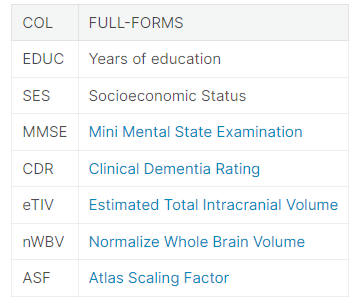

# **READING AND UNDERSTANDING DATA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('oasis_longitudinal.csv')

In [ ]:
df.shape

(373, 15)

In [ ]:
df.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


# **DATA INSPECTION AND DATA CLEANING**

In [ ]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Check skewness for handling null values

In [ ]:
df.SES.skew()

0.2215018695957971

In [ ]:
df.MMSE.skew()

-2.366086132004125

In [ ]:
df['SES'].fillna(df['SES'].mean(), inplace=True)

In [ ]:
df['MMSE'].fillna(df['MMSE'].median(), inplace=True)

In [ ]:
df.isnull().sum()


Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

ASSIGNING VALUES TO DEMENTED PATIENTS(INCLUDING THE PATIENTS WHO WERE DETECTED TO BE DEMENTED EVEN AFTER THE INITIAL VISIT) AS 1 AND NON DEMENTED PATIENT AS 0

In [ ]:
df = df.loc[df['Visit']==1]
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [ ]:
df.columns

Index(['Subject ID', 'Group', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

# **EXPLORATORY DATA ANALYSIS**

In this section, we have focused on exploring the relationship between each feature of MRI tests and dementia of the patient. The reason we conducted this Exploratory Data Analysis process is to state the relationship of data explicitly through a graph so that we could assume the correlations before data extraction or data analysis. It might help us to understand the nature of the data and to select the appropriate analysis method for the model later.

The minimum, maximum, and average values of each feature for graph implementation are as follows.
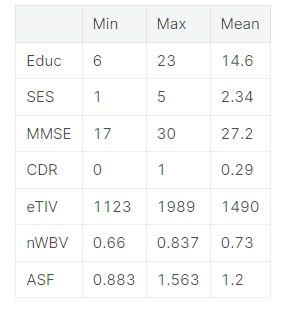

In [ ]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar', figsize=(10,4))

Text(0.5, 1.0, 'Gender and Demented rate')

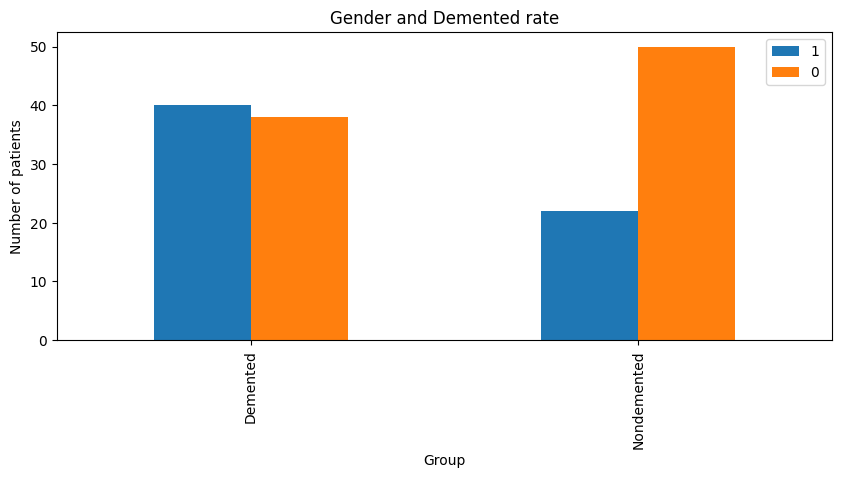

In [ ]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

Above graph indicates that men are more likely with dementia than women.

(15.3, 30.0)

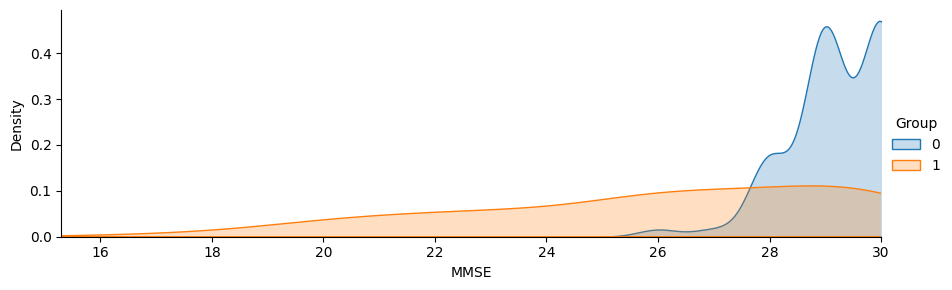

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

The chart shows Nondemented group got much more higher MMSE scores than Demented group.

(0.6, 0.9)

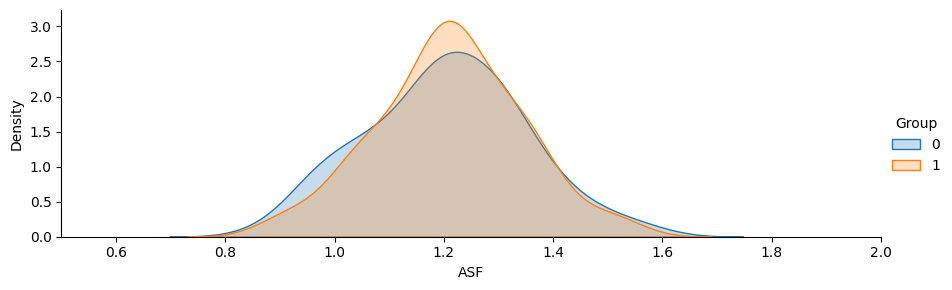

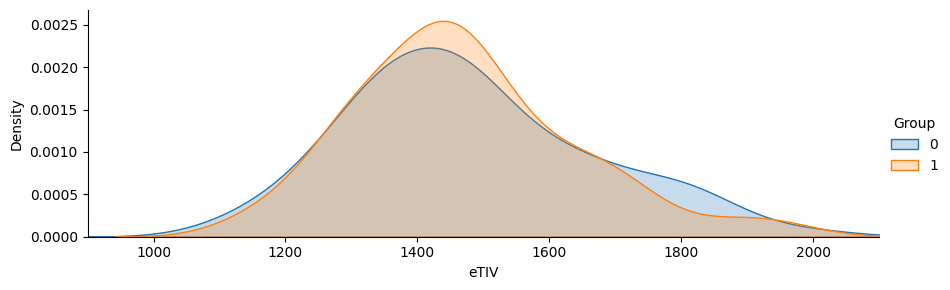

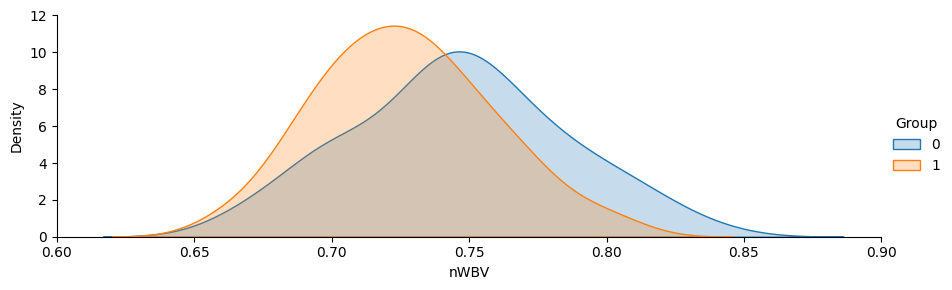

In [ ]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

The chart indicates that Nondemented group has higher brain volume ratio than Demented group. This is assumed to be because the diseases affect the brain to be shrinking its tissue.

(50.0, 100.0)

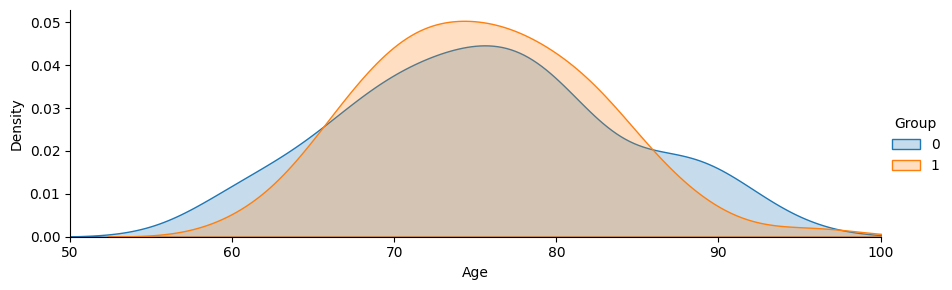

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.

(0.0, 0.16)

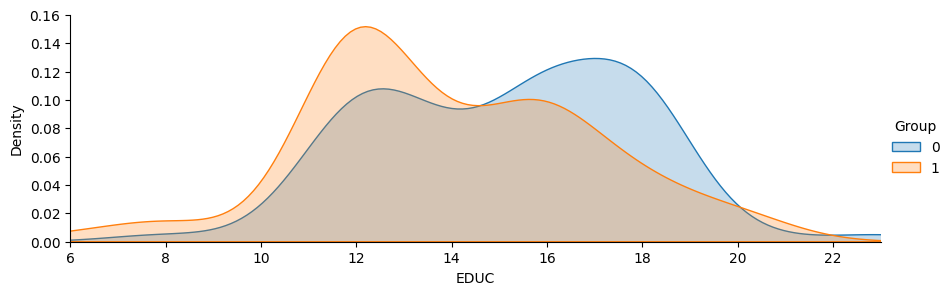

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

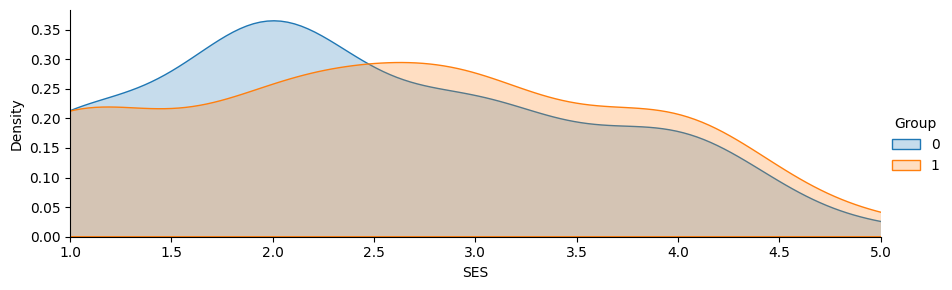

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'SES',shade= True)
facet.set(xlim=(df['SES'].min(), df['SES'].max()))
facet.add_legend()

Intermediate Result Summary

1.Men are more likely with demented, an Alzheimer's Disease, than Women.
2.Demented patients were less educated in terms of years of education.
3.Nondemented group has higher brain volume than Demented group.  
4.Higher concentration of 70-80 years old in Demented group than those in the nondemented patients.

In [ ]:
df['Group'].value_counts()

1    78
0    72
Name: Group, dtype: int64

There are total of 78 demented patients and 72 non demented patients

# **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:

Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age','EDUC' ,'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=0, )

# Feature scaling
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, Y_train)

LogisticRegression()

In [ ]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

In [ ]:
pd.DataFrame(zip(Y_train, y_pred_train), columns=['Actual','Predicted'])

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,1
4,0,1
...,...,...
107,0,0
108,0,0
109,1,1
110,0,0


In [ ]:
pd.DataFrame(zip(Y_test, y_pred_test), columns=['Actual','Predicted'])

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,0
4,1,0
5,0,0
6,1,1
7,1,1
8,0,0
9,1,1


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(Y_train, y_pred_train)

0.7678571428571429

In [ ]:
accuracy_score(Y_test, y_pred_test)

0.7631578947368421

In [ ]:
cm = pd.DataFrame(confusion_matrix(Y_test, y_pred_test))
cm

,0,1
0,15,3
1,6,14


In [ ]:
from sklearn.metrics import roc_curve,  roc_auc_score

In [ ]:
fpr,tpr,thres = roc_curve(Y_test, y_pred_test)
print(fpr," || ",tpr," || ",thres)

[0.         0.16666667 1.        ]  ||  [0.  0.7 1. ]  ||  [2 1 0]


In [ ]:
print(roc_auc_score(Y_test, y_pred_test))

0.7666666666666667


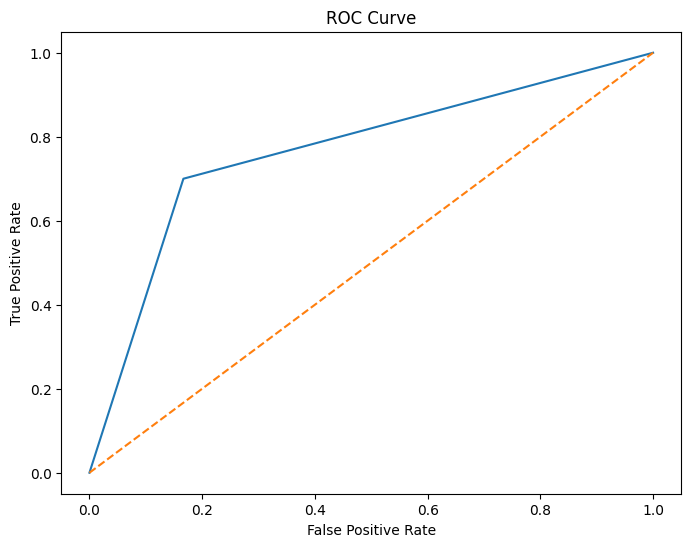

In [ ]:
fpr_log, tpr_log, thres_log = roc_curve(Y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
logreg.predict(X_test_scaled)

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
logreg.predict_proba(X_test_scaled)

array([[0.41438623, 0.58561377],
       [0.70177373, 0.29822627],
       [0.47700228, 0.52299772],
       [0.60106103, 0.39893897],
       [0.66550323, 0.33449677],
       [0.6281102 , 0.3718898 ],
       [0.08168924, 0.91831076],
       [0.24738778, 0.75261222],
       [0.72576929, 0.27423071],
       [0.08420744, 0.91579256],
       [0.1477631 , 0.8522369 ],
       [0.68925942, 0.31074058],
       [0.54554019, 0.45445981],
       [0.68785879, 0.31214121],
       [0.54095353, 0.45904647],
       [0.614691  , 0.385309  ],
       [0.4860161 , 0.5139839 ],
       [0.38448649, 0.61551351],
       [0.46973477, 0.53026523],
       [0.68122194, 0.31877806],
       [0.5969534 , 0.4030466 ],
       [0.25615135, 0.74384865],
       [0.06812907, 0.93187093],
       [0.59879671, 0.40120329],
       [0.62734575, 0.37265425],
       [0.75018768, 0.24981232],
       [0.54075892, 0.45924108],
       [0.73339727, 0.26660273],
       [0.3134673 , 0.6865327 ],
       [0.60849673, 0.39150327],
       [0.

In [ ]:
logreg.predict_proba(X_test_scaled)[:,1]

array([0.58561377, 0.29822627, 0.52299772, 0.39893897, 0.33449677,
       0.3718898 , 0.91831076, 0.75261222, 0.27423071, 0.91579256,
       0.8522369 , 0.31074058, 0.45445981, 0.31214121, 0.45904647,
       0.385309  , 0.5139839 , 0.61551351, 0.53026523, 0.31877806,
       0.4030466 , 0.74384865, 0.93187093, 0.40120329, 0.37265425,
       0.24981232, 0.45924108, 0.26660273, 0.6865327 , 0.39150327,
       0.36473311, 0.5969315 , 0.33665576, 0.89739862, 0.85218707,
       0.55804403, 0.72877651, 0.300539  ])

In [ ]:
preds1 = np.where(logreg.predict_proba(X_test_scaled)[:,1] > 0.55, 1, 0)
preds1


array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
accuracy_score(Y_test, preds1)

0.7894736842105263

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, Y_train)



DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7105263157894737


In [ ]:
# Create a decision tree classifier with hyperparameters
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.7368421052631579


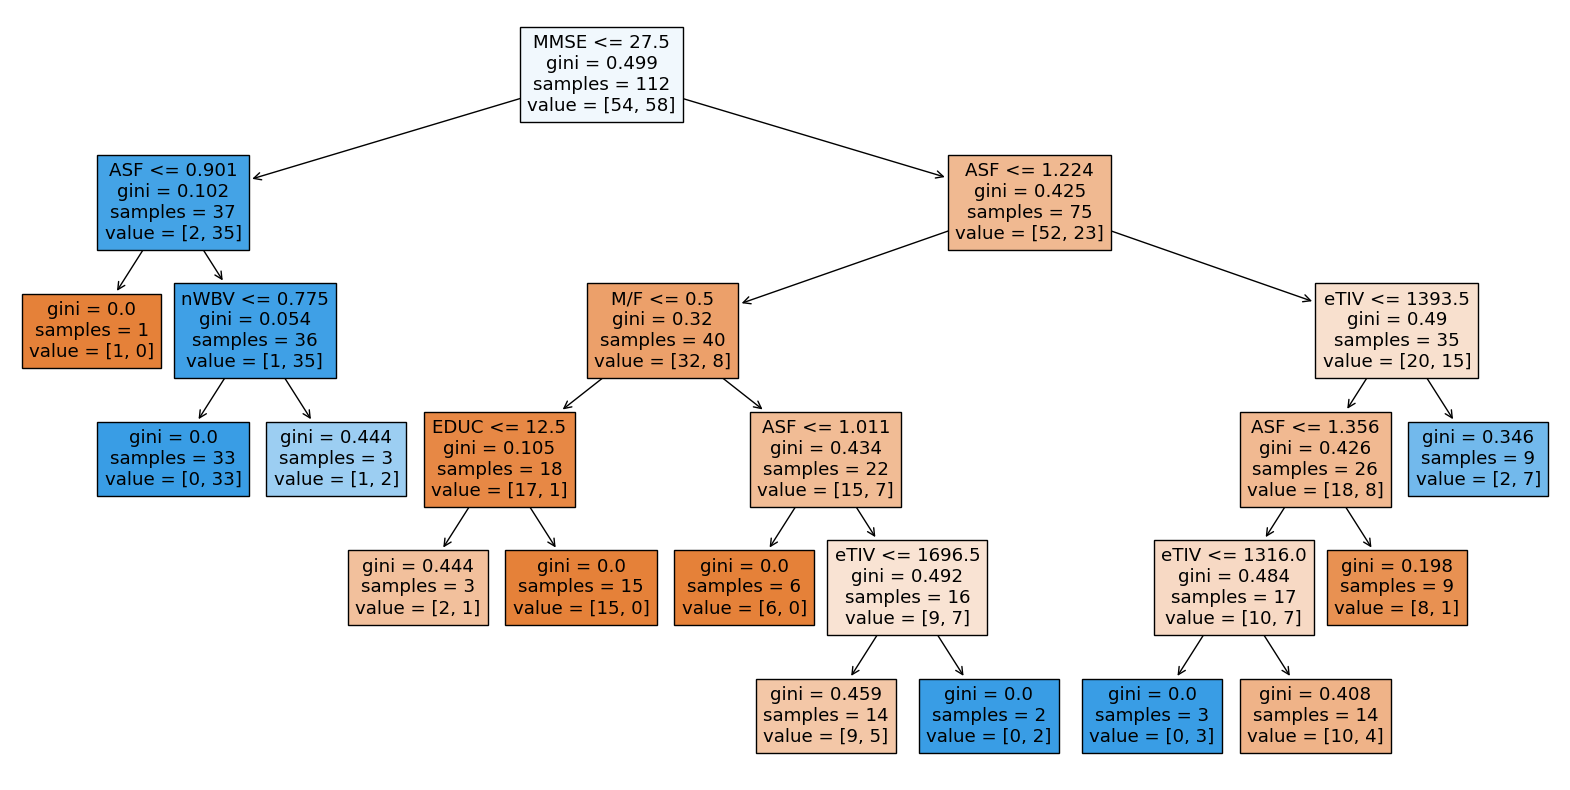

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()


# **RANDOM FOREST**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[15  3]
 [ 5 15]]


0.7894736842105263

In [ ]:
cm = pd.DataFrame(confusion_matrix(Y_test, y_pred))
cm.index = ['Actual Non Demented', 'Actual Demented']
cm.columns = ['Predicted Not Demented', 'Predicted Demented']
cm

,Predicted Not Demented,Predicted Demented
Actual Non Demented,15,3
Actual Demented,5,15


#CONCLUSION:#
ACCURACY OF CLASSIFIERS


1.   LOGISTIC REGRESSION : 78.9%
2.   DECISION TREE : 73.7%
3.   RANDOM FOREST : 78.9%

THE COLUMNS CONSIDERED WERE AS FOLLOWS:


1.   GENDER
2.   AGE
3.   EDUCATION
4.   MINI MENTAL STATE EXAMINATION
5.   ESTIMATED TOTAL INTRACRANIAL VOLUME
6.   NORMALIZED WHOLE BRAIN VOLUME
7.   ATLAS SCALING FACTOR

HENCE WE CONCLUDE THAT LOGISTIC REGRESSION HAS THE HIGHEST ACCURACY FOLLOWED BY RANDOM FOREST AND DECISION TREE RESPECTIVELY

